<a href="https://colab.research.google.com/github/nufarsa/homicide/blob/main/P146223UKM_Homicide_Corrections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Analysis On Person Who Attempted / Suspected With Homicide**

**Introduction :**
The statistical definition contains three elements that characterize the killing of a person as 'intentional homicide':
1. The killing of a person by another person (objective element).
2. The intent of the perpetrator to kill or seriously injure the victim (subjective element).
3. The unlawfulness of the killing (legal element)

I decided to take point no 1 as my analysis for this project assignment. The data include **the Gender, Region , Country and Age group**

**Problem Statment:**
The focus is on the objective element where killing a person by another person, which strictly involves the individuals who attempted/suspected to killing person. I want to see which target age group and country I as a representative analyst of United Nation (UN) to focus on the campaign of zero crimes.  


**Results & Discussion**
The project generate visualizations and insights to highlight trends, disparities, and patterns in the data related to intentional homicides. Every of the visualization has its own analysis

**Sources**
Data are collected from national authorities through the annual United Crimes Trends' Survey (UN-CTS). Source : [UNDOC](https://dataunodc.un.org/dp-intentional-homicide-offenders)

**Data Loading & Storage**

In [44]:
# Check where file being uploaded
# pwd -> "present working directory"
!pwd

/content


In [68]:
# Import the library
import pandas as pd
import numpy as np

In [46]:
# Read using the excel table function
homicide = pd.read_excel('/content/data_cts_interhomicide.xlsx')
print(homicide.head(2))

  Iso3_code      Country  Region       Subregion  \
0       ARM      Armenia    Asia    Western Asia   
1       CHE  Switzerland  Europe  Western Europe   

                                           Indicator       Dimension  \
0  Persons arrested/suspected for intentional hom...  by citizenship   
1  Persons arrested/suspected for intentional hom...  by citizenship   

            Category   Sex    Age  Year Unit of measurement  VALUE Source  
0  National citizens  Male  Total  2013              Counts   35.0    CTS  
1  National citizens  Male  Total  2013              Counts   28.0    CTS  


**Check For Missing Data Within The Dataset**

In [47]:
# Save the dataframe to a CSV file
csv_file = 'intentional_homicide.csv'
homicide.to_csv(csv_file, index=False)
print(homicide.head(2))

  Iso3_code      Country  Region       Subregion  \
0       ARM      Armenia    Asia    Western Asia   
1       CHE  Switzerland  Europe  Western Europe   

                                           Indicator       Dimension  \
0  Persons arrested/suspected for intentional hom...  by citizenship   
1  Persons arrested/suspected for intentional hom...  by citizenship   

            Category   Sex    Age  Year Unit of measurement  VALUE Source  
0  National citizens  Male  Total  2013              Counts   35.0    CTS  
1  National citizens  Male  Total  2013              Counts   28.0    CTS  


**I used to run in csv format instead of excel format. I convert the excel file to csv and save in \content**

In [48]:
# read the new CSV file
# I comfortable to analyze a data using CSV format instead of excel
homicide_new = pd.read_csv('intentional_homicide.csv')
print(homicide_new.head(2))

  Iso3_code      Country  Region       Subregion  \
0       ARM      Armenia    Asia    Western Asia   
1       CHE  Switzerland  Europe  Western Europe   

                                           Indicator       Dimension  \
0  Persons arrested/suspected for intentional hom...  by citizenship   
1  Persons arrested/suspected for intentional hom...  by citizenship   

            Category   Sex    Age  Year Unit of measurement  VALUE Source  
0  National citizens  Male  Total  2013              Counts   35.0    CTS  
1  National citizens  Male  Total  2013              Counts   28.0    CTS  


<font color='red'>**Comment:**

<font color='red'>**- Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**- What's the purpose running the above code**



**This is a summarize of missing data in each column for dataset 'intentional_homicide.csv'. There are total of 4 missing data for column Country, Region, Subregion which can make the analysis inaccurate. I want to analyze data that have values only so that the insights can be more accurate**

In [49]:
# Check for missing data
missing_data = homicide_new.isnull().sum()

# Print the summary of missing data
print("Summary of missing data:", missing_data)

Summary of missing data: Iso3_code              0
Country                4
Region                 4
Subregion              4
Indicator              0
Dimension              0
Category               0
Sex                    0
Age                    0
Year                   0
Unit of measurement    0
VALUE                  0
Source                 0
dtype: int64


<font color='red'>**Comments:**

<font color='red'>**- What does the above output indicate?**

<font color='red'>**- Does it align with your expectations?**

**After found out there are missing data in Country, Region, Subregion. I print all the column unique value to identify each column missing data, what is the missing data looks like. Found out there are nan wording int the data**

In [50]:
# Check structure of the data
# Checking unique data for each column
for column in homicide_new.columns:
    unique_values = homicide_new[column].unique()
    print(column, unique_values)

Iso3_code ['ARM' 'CHE' 'COL' 'CZE' 'DEU' 'FIN' 'GTM' 'HND' 'HUN' 'ISL' 'ITA' 'JPN'
 'LKA' 'LTU' 'MNG' 'NOR' 'SRB' 'SVK' 'SVN' 'TUR' 'ATG' 'AUT' 'BEL' 'BLZ'
 'BOL' 'BTN' 'DNK' 'FRA' 'GRC' 'MAC' 'RUS' 'UZB' 'ALB' 'AZE' 'BRB' 'CHL'
 'ESP' 'GRD' 'GUY' 'HRV' 'LIE' 'LVA' 'MNE' 'PAN' 'DMA' 'JOR' 'KNA' 'LCA'
 'MEX' 'MLT' 'OMN' 'TTO' 'BGR' 'BHS' 'CAN' 'CRI' 'DOM' 'SLV' 'URY' 'BIH'
 'VCT' 'ECU' 'VAT' 'IDN' 'MAR' 'MUS' 'ABW' 'AIA' 'AUS' 'BLR' 'BMU' 'BRA'
 'CYM' 'CYP' 'EGY' 'EST' 'FJI' 'GBR_E_W' 'GBR_NI' 'GBR_S' 'GEO' 'HKG'
 'IND' 'IRL' 'IRQ' 'ISR' 'JAM' 'KAZ' 'KOR' 'LSO' 'MDA' 'MDV' 'MMR' 'MSR'
 'MYS' 'NIC' 'NLD' 'NPL' 'NZL' 'PAK' 'PHL' 'POL' 'PRI' 'PRT' 'QAT' 'ROU'
 'SGP' 'STP' 'SWE' 'SWZ' 'TCA' 'THA' 'TJK' 'TKM' 'UKR' 'USA' 'VEN' 'VGB'
 'ZMB' 'ZWE' 'KIR' 'MHL' 'CUB' 'GRL' 'KHM' 'LUX' 'SHN' 'ZAF' 'BHR' 'CHN'
 'NAM' 'PSE' 'SMR' 'TON' 'TZA' 'UGA' 'BRN' 'KWT' 'SYR' 'VIR' 'MKD' 'PNG'
 'YEM' 'SAU' 'BGD' 'CMR' 'GUM' 'MWI' 'PRY' 'SUR' 'ARG' 'ASM' 'BWA' 'CUW'
 'GHA' 'MCO' 'MOZ' 'VNM' 'TUV' 'CPV' 'AND' '

**Remove column Iso3_code & Sources
 because its unused for my analysis**

**Iso3_code** needs to be removed because the data contains a code of the country, if I analyzed this code, my end user will not understand the codes at all. So I better maintain the Country name.

**Source** needs to be removed from the dataset because I am not going to analyze from which sources the data come, I can do this separately in text processing analysis.

**Dimension** the data has been grouped by 'by citizenship', 'Total' ,'by relationship to perpetrator', 'by situational context' ,'by mechanisms' and  'by location'. It seems as an indicator to the dataset only. No need for me to know.

**Subregion** I remove this as I no need to analyze this based on subregion, region information is just enough.

**Catgeory** its a category of the homicide people from which sources. I think I no need this. Too much column.

In [51]:
# Specify the column you want to remove
rm_column = ['Iso3_code', 'Source', 'Dimension', 'Subregion', 'Category']

# Remove the column - directly pass the rm_column
# List to the 'columns' parameter
homicide_new.drop(columns=rm_column, inplace=True)

**Remove Row**

From the unique data that I extract above, found out there are 2 unnecessry wording for age Total and Unknown. I remove it since I am not sure what it is used for.

In [52]:
# Assuming you want to drop rows where the 'Country' column has values 'Total' or 'Uknown'
rm_row_indices = homicide_new[(homicide_new['Age'] == 'Total') | (homicide_new['Age'] == 'Unknown')].index

# Remove the rows by their indices
homicide_new.drop(index=rm_row_indices, inplace=True)

<font color='red'>**Comments:**

<font color='red'>**- Could you explain why you decided to remove the rows?**

<font color='red'>**- What is your justification for this decision?**

**Reupload Cleaned Dataset**

In [53]:
# Save the updated file to CSV file
homicide_new.to_csv('intentional_homicide_cleaned.csv', index=False)

In [54]:
# Read the new cleaned data into googl collab
cleaned_homicide = pd.read_csv('/content/intentional_homicide_cleaned.csv')
print(cleaned_homicide.head(2))

   Country    Region                        Indicator   Sex  Age  Year  \
0  Austria    Europe  Victims of intentional homicide  Male  0-9  2010   
1   Canada  Americas  Victims of intentional homicide  Male  0-9  2010   

  Unit of measurement  VALUE  
0              Counts    1.0  
1              Counts   20.0  


So now, I already get a clean dataset with the data that I want to analyze

In [55]:
# sys.stdout - prints the text result to the console instead of writing
import sys

# Fill missing data with 0
# na_rep: missing data representation
cleaned_homicide.to_csv(sys.stdout, na_rep='0')

Streaming output truncated to the last 5000 lines.
34143,Colombia,Americas,Persons arrested/suspected for intentional homicide,Male,25-29,2014,"Rate per 100,000 population",75.6745214354722
34144,Costa Rica,Americas,Persons arrested/suspected for intentional homicide,Male,25-29,2014,"Rate per 100,000 population",25.5494310520215
34145,Czechia,Europe,Persons arrested/suspected for intentional homicide,Male,25-29,2014,"Rate per 100,000 population",2.22920707104483
34146,Germany,Europe,Persons arrested/suspected for intentional homicide,Male,25-29,2014,"Rate per 100,000 population",2.81843185879199
34147,Dominican Republic,Americas,Persons arrested/suspected for intentional homicide,Male,25-29,2014,"Rate per 100,000 population",29.7665059890672
34148,Algeria,Africa,Persons arrested/suspected for intentional homicide,Male,25-29,2014,"Rate per 100,000 population",12.5244884674201
34149,Ecuador,Americas,Persons arrested/suspected for intentional homicide,Male,25-29,2014,"Rate per 100,000 pop

# **Create 5 visualizations**

In [69]:
# Load library
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import seaborn as sns

## **Barplot on Persons arrested/suspected for intentional homicide**

To identify the counts in all regions for Female and Male

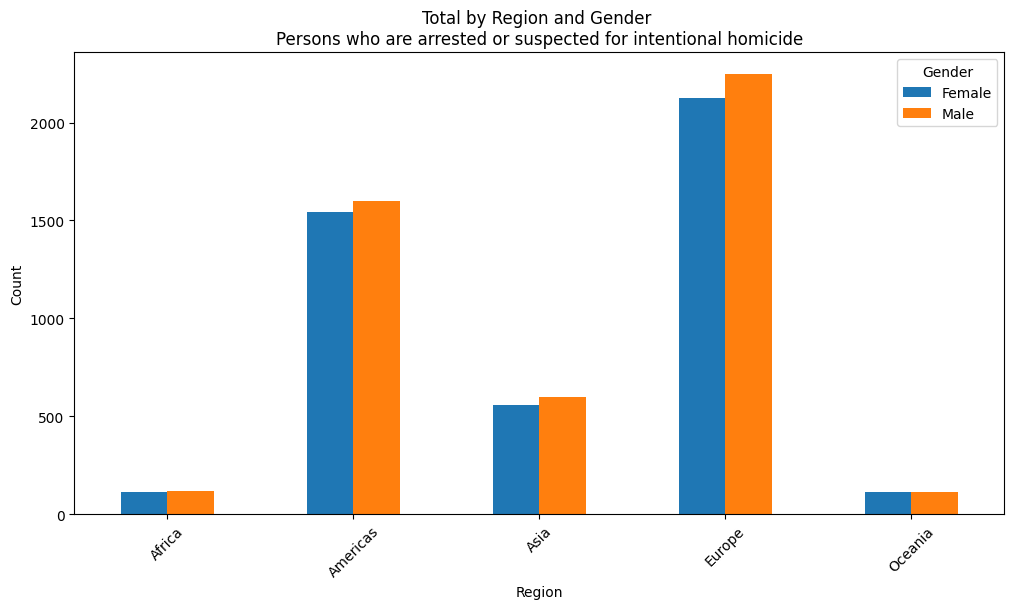

In [57]:
# List of indicators to filter by
#filterby_indicator = ["Death due to intentional homicide in prison","Persons arrested/suspected for intentional homicide"]
#filterby_indicator = "Persons arrested/suspected for intentional homicide"

# Apply all filters: Unit of measurement 'Counts' and the specified indicators
filtered_df = cleaned_homicide[(cleaned_homicide['Unit of measurement'] == 'Counts') &
                               (cleaned_homicide['Indicator']== 'Persons arrested/suspected for intentional homicide') &
                               (cleaned_homicide['Unit of measurement'] == 'Counts')]

# Group by 'Region' and 'Sex' and count the occurrences
grouped_df = filtered_df.groupby(['Region', 'Sex']).size().unstack()

# Plot the bar chart
grouped_df.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Total by Region and Gender \nPersons who are arrested or suspected for intentional homicide')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

**Analysis** : Barplot explained the total number of person who are arrested or suspected for intentional homicide(indicator) based on regions Africa, Americas, Asia, Europe, and Oceania for Male and Female category.

The graph shows that Europe has the largest counts most equally count for male and female. While for America has the second largest counts for female and male follows by Asia. The least counts are Africa and Oceania have the smallest, with a nearly balanced male-to-female ratio across regions.

I accidently copy the same code from above row cell. KIndly please ignore the process for this code. Just purposely to view again

In [58]:
# cleaned_homicide.head(2)

<font color='red'>**Comment:**

<font color='red'>**- Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**- What's the purpose running the above code**

## **Line plot For Persons arrested/suspected for intentional homicide 2008 - 2022**

In [78]:
#checking the dataset header
print(cleaned_homicide.head(2))

   Country    Region                        Indicator   Sex  Age  Year  \
0  Austria    Europe  Victims of intentional homicide  Male  0-9  2010   
1   Canada  Americas  Victims of intentional homicide  Male  0-9  2010   

  Unit of measurement  VALUE  
0              Counts    1.0  
1              Counts   20.0  


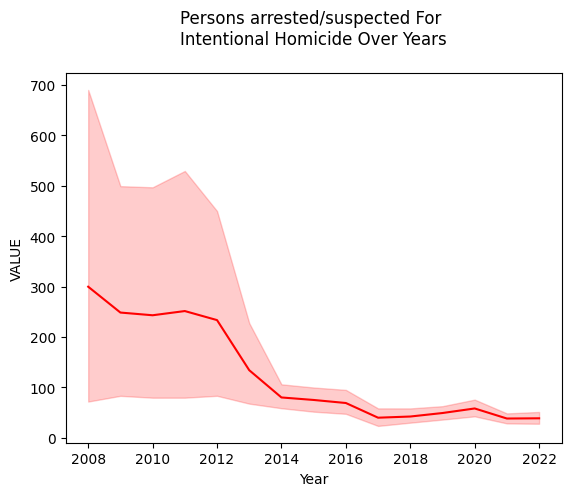

In [86]:
# loading dataset
data_homicide = cleaned_homicide

# Apply all filters: Unit of measurement 'Counts' and the specified indicators
filtered_data = cleaned_homicide[(cleaned_homicide['Unit of measurement'] == 'Counts') &
                               (cleaned_homicide['Indicator']== 'Persons arrested/suspected for intentional homicide')]

# draw lineplot
# Corrected the 'y' variable to 'Value'
sns.lineplot(x="Year", y="VALUE", color="red" ,data=filtered_data)
plt.title('Persons arrested/suspected For \nIntentional Homicide Over Years\n')
plt.show()


**Analysis** : This graph shows the total number of person who attempted/ suspected on homicide over 2008 to 2022. From the graph we can see there is a trend of decrease in the counts of the individuals who were arrested/suspected in homicide, dark <font color='red'>**red line**</font> represents actual data and we can see the trend in the count of individuals over the years.

The <font color='red'>**light red shaded region**</font> around the line represents the interval or range of variability which shows the possible fluctuation in the totals. We can see in 2008, the range of the light red shaded region is big. Please find below explanation:-

<font color='red'>**Comments:**

<font color='red'>**- I don’t see a blue line in your line plot. Do you?**

From **2008–2011**: The individuals who arrested/suspected for homicide are high in 2008, then the numbers are flatten from 2010, and there is small spike in 2011.

From **2012–2014**: We can see a sharp decrease is noticeable in 2012, and the counts started to decrease in 2013 and 2014, this indicates a significant drop in the number of people attempting/suspecting for homicide.

From **2014–2019**: We can see the line is stabilize at a much lower value (flatten), showing little variation in person who attempt/suspect for homicide in these 5 years.

From **2020–2022**: In 2020, a little spike in 2020 in suspecting/attempting homicide. This is a covid-19 era which caused the world faces pandemic that caused many factors for attempt/suspect for homicide. In 2021, starting to flatten and the graph keep decreasing.

The graph suggests that the number of attempted homicides has decreased significantly over time, particularly during 2013–2016. The decrease in number of attempt shows the <font color='red'>**success of policies or interventions aimed at reducing violent crimes**.</font>



> The Global Study on Homicide 2019 also documents successes in preventing and addressing lethal violence. In particular, the study offers examples of effective community-based interventions in settings afflicted by violence, gangs and organized crime. These accounts show that with targeted interventions backed by sustained engagement and trust between communities and law enforcement, bringing down homicide rates is possible. (Global Homicide 2019, p. 6)



**Reference** : [UnDOC](https://www.unodc.org/documents/data-and-analysis/gsh/Booklet1.pdf)

<font color='red'>**Comments:**

<font color='red'>**- Do you have any published reports that attribute the reduction in violent cases to policy changes or interventions?**

**Total Individuals of Attempted/Suspected Homicide by Region**

## **Histogram with Kernel Density Estimate (KDE) Overlay**

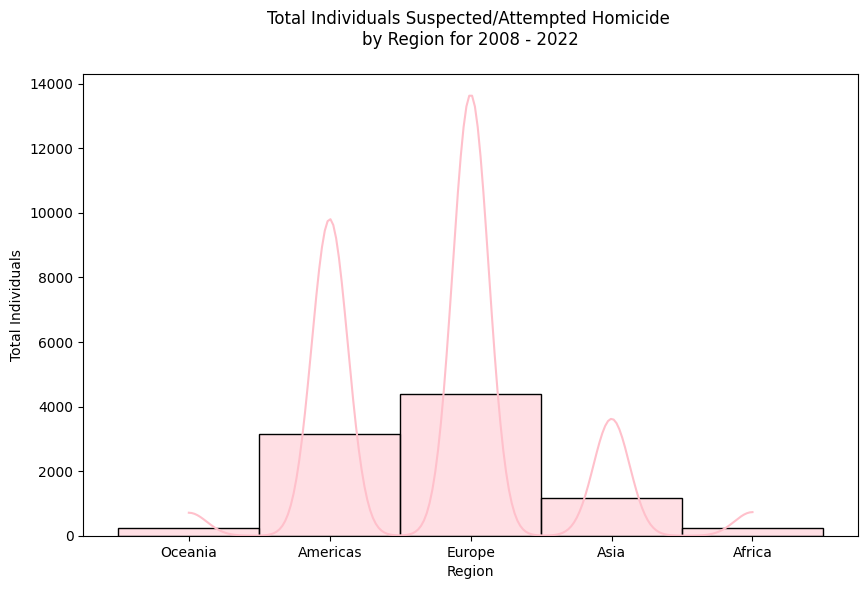

In [84]:
plt.figure(figsize=(10, 6))
# KDE for show the probability density of the distribution
sns.histplot(data=filtered_data, x='Region', kde=True, bins=20, color='Pink')
plt.title('Total Individuals Suspected/Attempted Homicide \nby Region for 2008 - 2022\n')
plt.xlabel('Region')
plt.ylabel('Total Individuals')
plt.show()

**Analysis** : This graph represents the Total number of individuals suspected/attempted homicide by region from 2003 to 2022**. The bars represent the total number of individuals suspected/attempted homicide in each region.

As we can see the Europe has highest count within other region, followed by the Americas, then Asia, while Oceania and Africa have the lowest counts.

The line each histogram represent represents the distribution of data and showing spikes where there is a high counts of cases. The highest peak is over Europe, suggesting a high number of attemps/suspects in Europe.vThe smaller peak over Asia suggests a moderate number of cases with the same indicator.While Oceania and Africa have very low peaks, meaning fewer recorded cases.


<font color='red'>**Comment:**

<font color='red'>**- Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**- What's the purpose running the above code**

<font color='red'>**- Could you provide an explanation for the histogram plot above?**

## **Histogram Top 10 Countries in Europe & Top Countries in Ocenia With Person  Attempt/Suspect Homicide (Largest Crime & Lowest Crime)**

### Europe Region

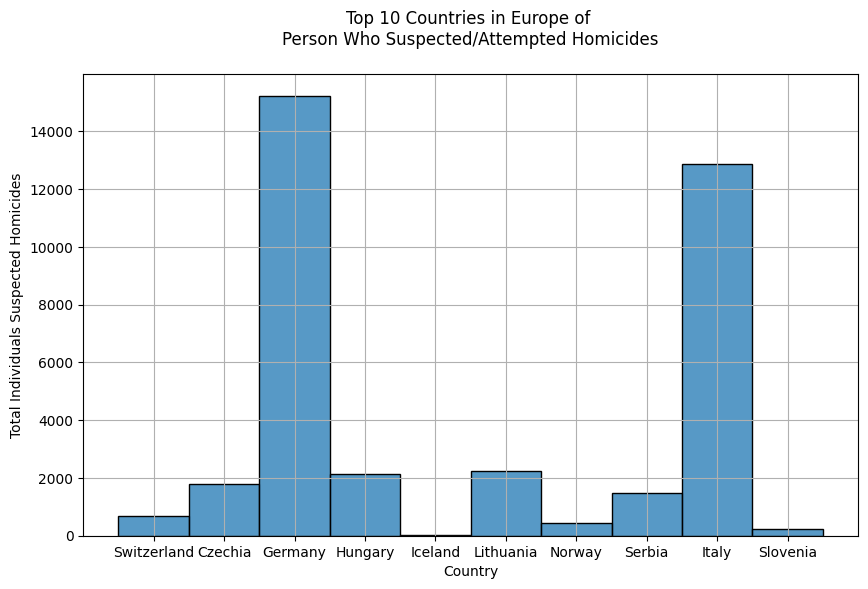

In [90]:
filteredby_country=cleaned_homicide[(cleaned_homicide['Unit of measurement'] == 'Counts') &
                               (cleaned_homicide['Indicator']== 'Persons arrested/suspected for intentional homicide') &
                               (cleaned_homicide['Region']== 'Europe')     ]


# Calculate the frequency of each region
freq = filteredby_country['Country'].value_counts().nlargest(10)

# Filter the DataFrame to include only the top 10 frequencies
top_10_df = filteredby_country[filteredby_country['Country'].isin(freq.index)]

# Create the histplot for the top 10 frequencies
plt.figure(figsize=(10, 6))
sns.histplot(data=top_10_df, x='Country', weights='VALUE', discrete=True, multiple="stack")

# Customize the plot
plt.xlabel('Country')
plt.ylabel('Total Individuals Suspected Homicides', rotation=90)
plt.title('Top 10 Countries in Europe of \nPerson Who Suspected/Attempted Homicides\n')
plt.grid(True)
plt.show()

**Analysis:**
From this plot, we can see that a high counts of total person in Germany & Italy comitted for higher rate of criminal activities. From the graph we now that both of this countries have large population. This might be one of the factor that lead to high criminal rates.

If we see the top 100 of the country that has the largest comitted of attempted murder, Germany has the highest counts of attempts. We can see from the articles in here : [Woman is killed every day](https://www.theguardian.com/commentisfree/2024/dec/09/germany-woman-killed-sexism-violence)

The lowest as show in the plot is from Iceland. This proved that, Iceland’s strong social structures, low inequality, and trust in institutions contribute to its exceptionally low crime rate. Please read here [why Iceland is the safest country in the world  ](https://icelandtravelguide.is/blog-posts/iceland-is-the-safest-country-in-the-world/)


### Oceania Region

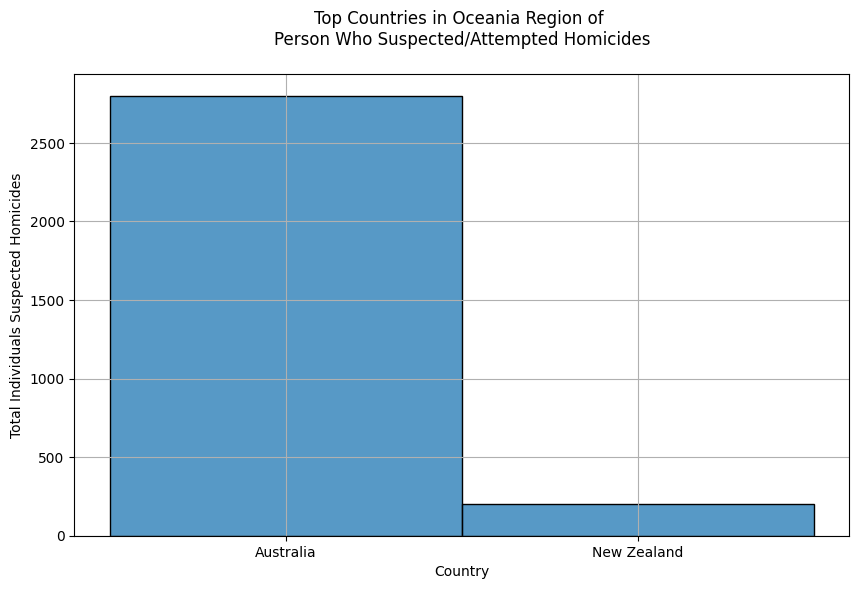

In [95]:
filteredby_country_ocenia=cleaned_homicide[(cleaned_homicide['Unit of measurement'] == 'Counts') &
                               (cleaned_homicide['Indicator']== 'Persons arrested/suspected for intentional homicide') &
                               (cleaned_homicide['Region']== 'Oceania')     ]


# Calculate the frequency of each region
freq = filteredby_country_ocenia['Country'].value_counts().nlargest(10)

# Filter the DataFrame to include only the top 10 frequencies
top_10_df = filteredby_country_ocenia[filteredby_country_ocenia['Country'].isin(freq.index)]

# Create the histplot for the top 10 frequencies
plt.figure(figsize=(10, 6))
sns.histplot(data=top_10_df, x='Country', weights='VALUE', discrete=True, multiple="stack")

# Customize the plot
plt.xlabel('Country')
plt.ylabel('Total Individuals Suspected Homicides', rotation=90)
plt.title('Top Countries in Oceania Region of \nPerson Who Suspected/Attempted Homicides\n')
plt.grid(True)
plt.show()

In contrast, Region Ocenia <font color='red'>**(can you provide examples of countries in Region Oceania?)**</font> has the lowest count,related to safer or has fewer reported incidents.

**Analysis**: In line with become the 4th place in [Global Peace Index ](https://en.wikipedia.org/wiki/Global_Peace_Index) , New Zealnd has become one of the safest country to visit one of it due to lower criminal rates. Compared to all countries in europe, New Zealand crimes rates is LESS THAN 500 persons who comitted to attempt/suspect homicide.


## **Scatter Plot on Total Persons Who Attempted/ Suspected Homicide by Age Group**

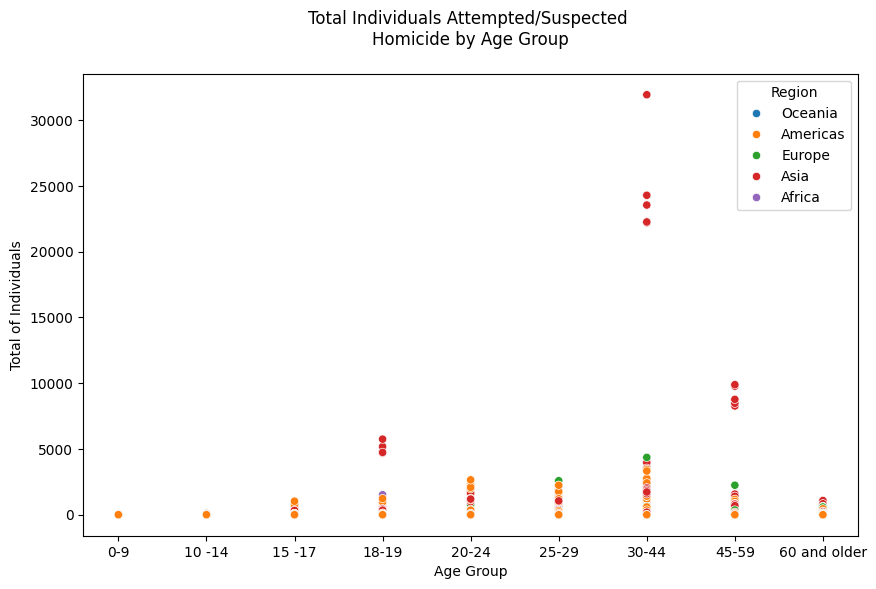

In [112]:
# Filter data for Persons arrested/suspected for intentional homicide and the total
filtered_data = cleaned_homicide[(cleaned_homicide['Unit of measurement'] == 'Counts') &
                                 (cleaned_homicide['Indicator'] == 'Persons arrested/suspected for intentional homicide')]

# Code for the scatter plot
# scatter Plot
plt.figure(figsize=(10, 6))
# Corrected 'Value' to 'VALUE'
sns.scatterplot(data=filtered_data, x='Age', y='VALUE', hue='Region')
plt.ylabel('Total of Individuals')
plt.xlabel('Age Group')
plt.title('Total Individuals Attempted/Suspected \nHomicide by Age Group\n')
plt.show()

**Analysis:**
From the scatterplot we can see the youngest age group who attempted to homicide comes from Americas Regions. This is proved by list in [Wikipedia](https://en.wikipedia.org/wiki/List_of_youngest_killers). Age group of individuals comes from age of 18 to 19 which having the highest number of person attempt/suspect to homicide are from Asia. Same goes to age group 30-44 and 45-59, Asia dominates the counts in person who attempt/suspect in homicide which has the extreme outliers!!

<font color='red'>**Comments:**

<font color='red'>**- I don't see a pie chart. Do you?**

### **Pie Chart Top 3 Americas Country With Highest Counts**


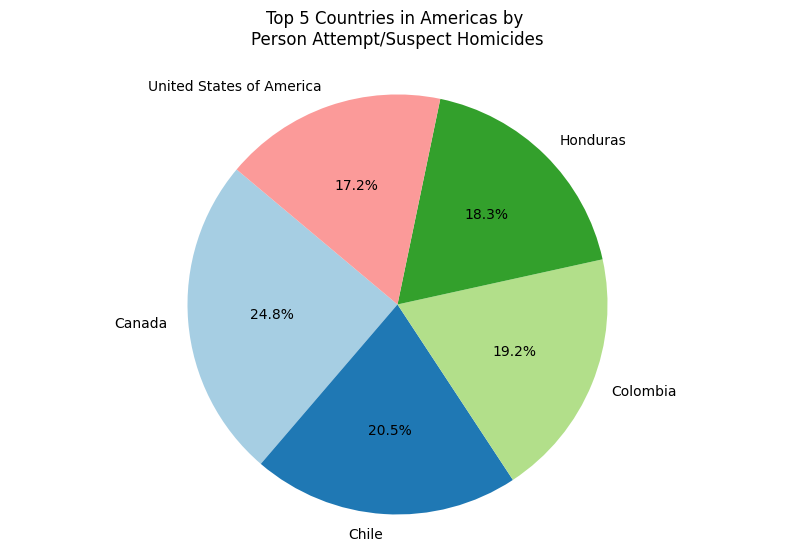

In [124]:
filteredby_country_ar=cleaned_homicide[(cleaned_homicide['Unit of measurement'] == 'Counts') &
                               (cleaned_homicide['Indicator']== 'Persons arrested/suspected for intentional homicide') &
                               (cleaned_homicide['Region']== 'Americas')     ]


# Calculate the frequency of Americas
freq = filteredby_country_ar['Country'].value_counts().nlargest(5)

# Get the top 5 countries
top_5_counts = freq

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(top_10_counts, labels=top_5_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Customize the chart
plt.title('Top 5 Countries in Americas by \nPerson Attempt/Suspect Homicides\n')
plt.axis('equal')  # Ensures the pie chart is a circle

# Show the chart
plt.show()


**Analysis:**
From the pie chart the most person who commited coming from Canada Countries, followed by Chile and Colombia. Amazingly, United State of Americas has become the lowest amongst other countries in its region.

## **Heatmap countries in America Region has the youngest individuals age less 18 years old attempted homicide**

In [135]:
# filter
filteredby_america1=cleaned_homicide[(cleaned_homicide['Unit of measurement'] == 'Counts') &
                               (cleaned_homicide['Indicator']== 'Persons arrested/suspected for intentional homicide') &
                               (cleaned_homicide['Region']== 'Americas') &
                               (cleaned_homicide['Age']== '0-9') |   (cleaned_homicide['Age']== '10 -14') |
                               (cleaned_homicide['Age']== '15 -17')]



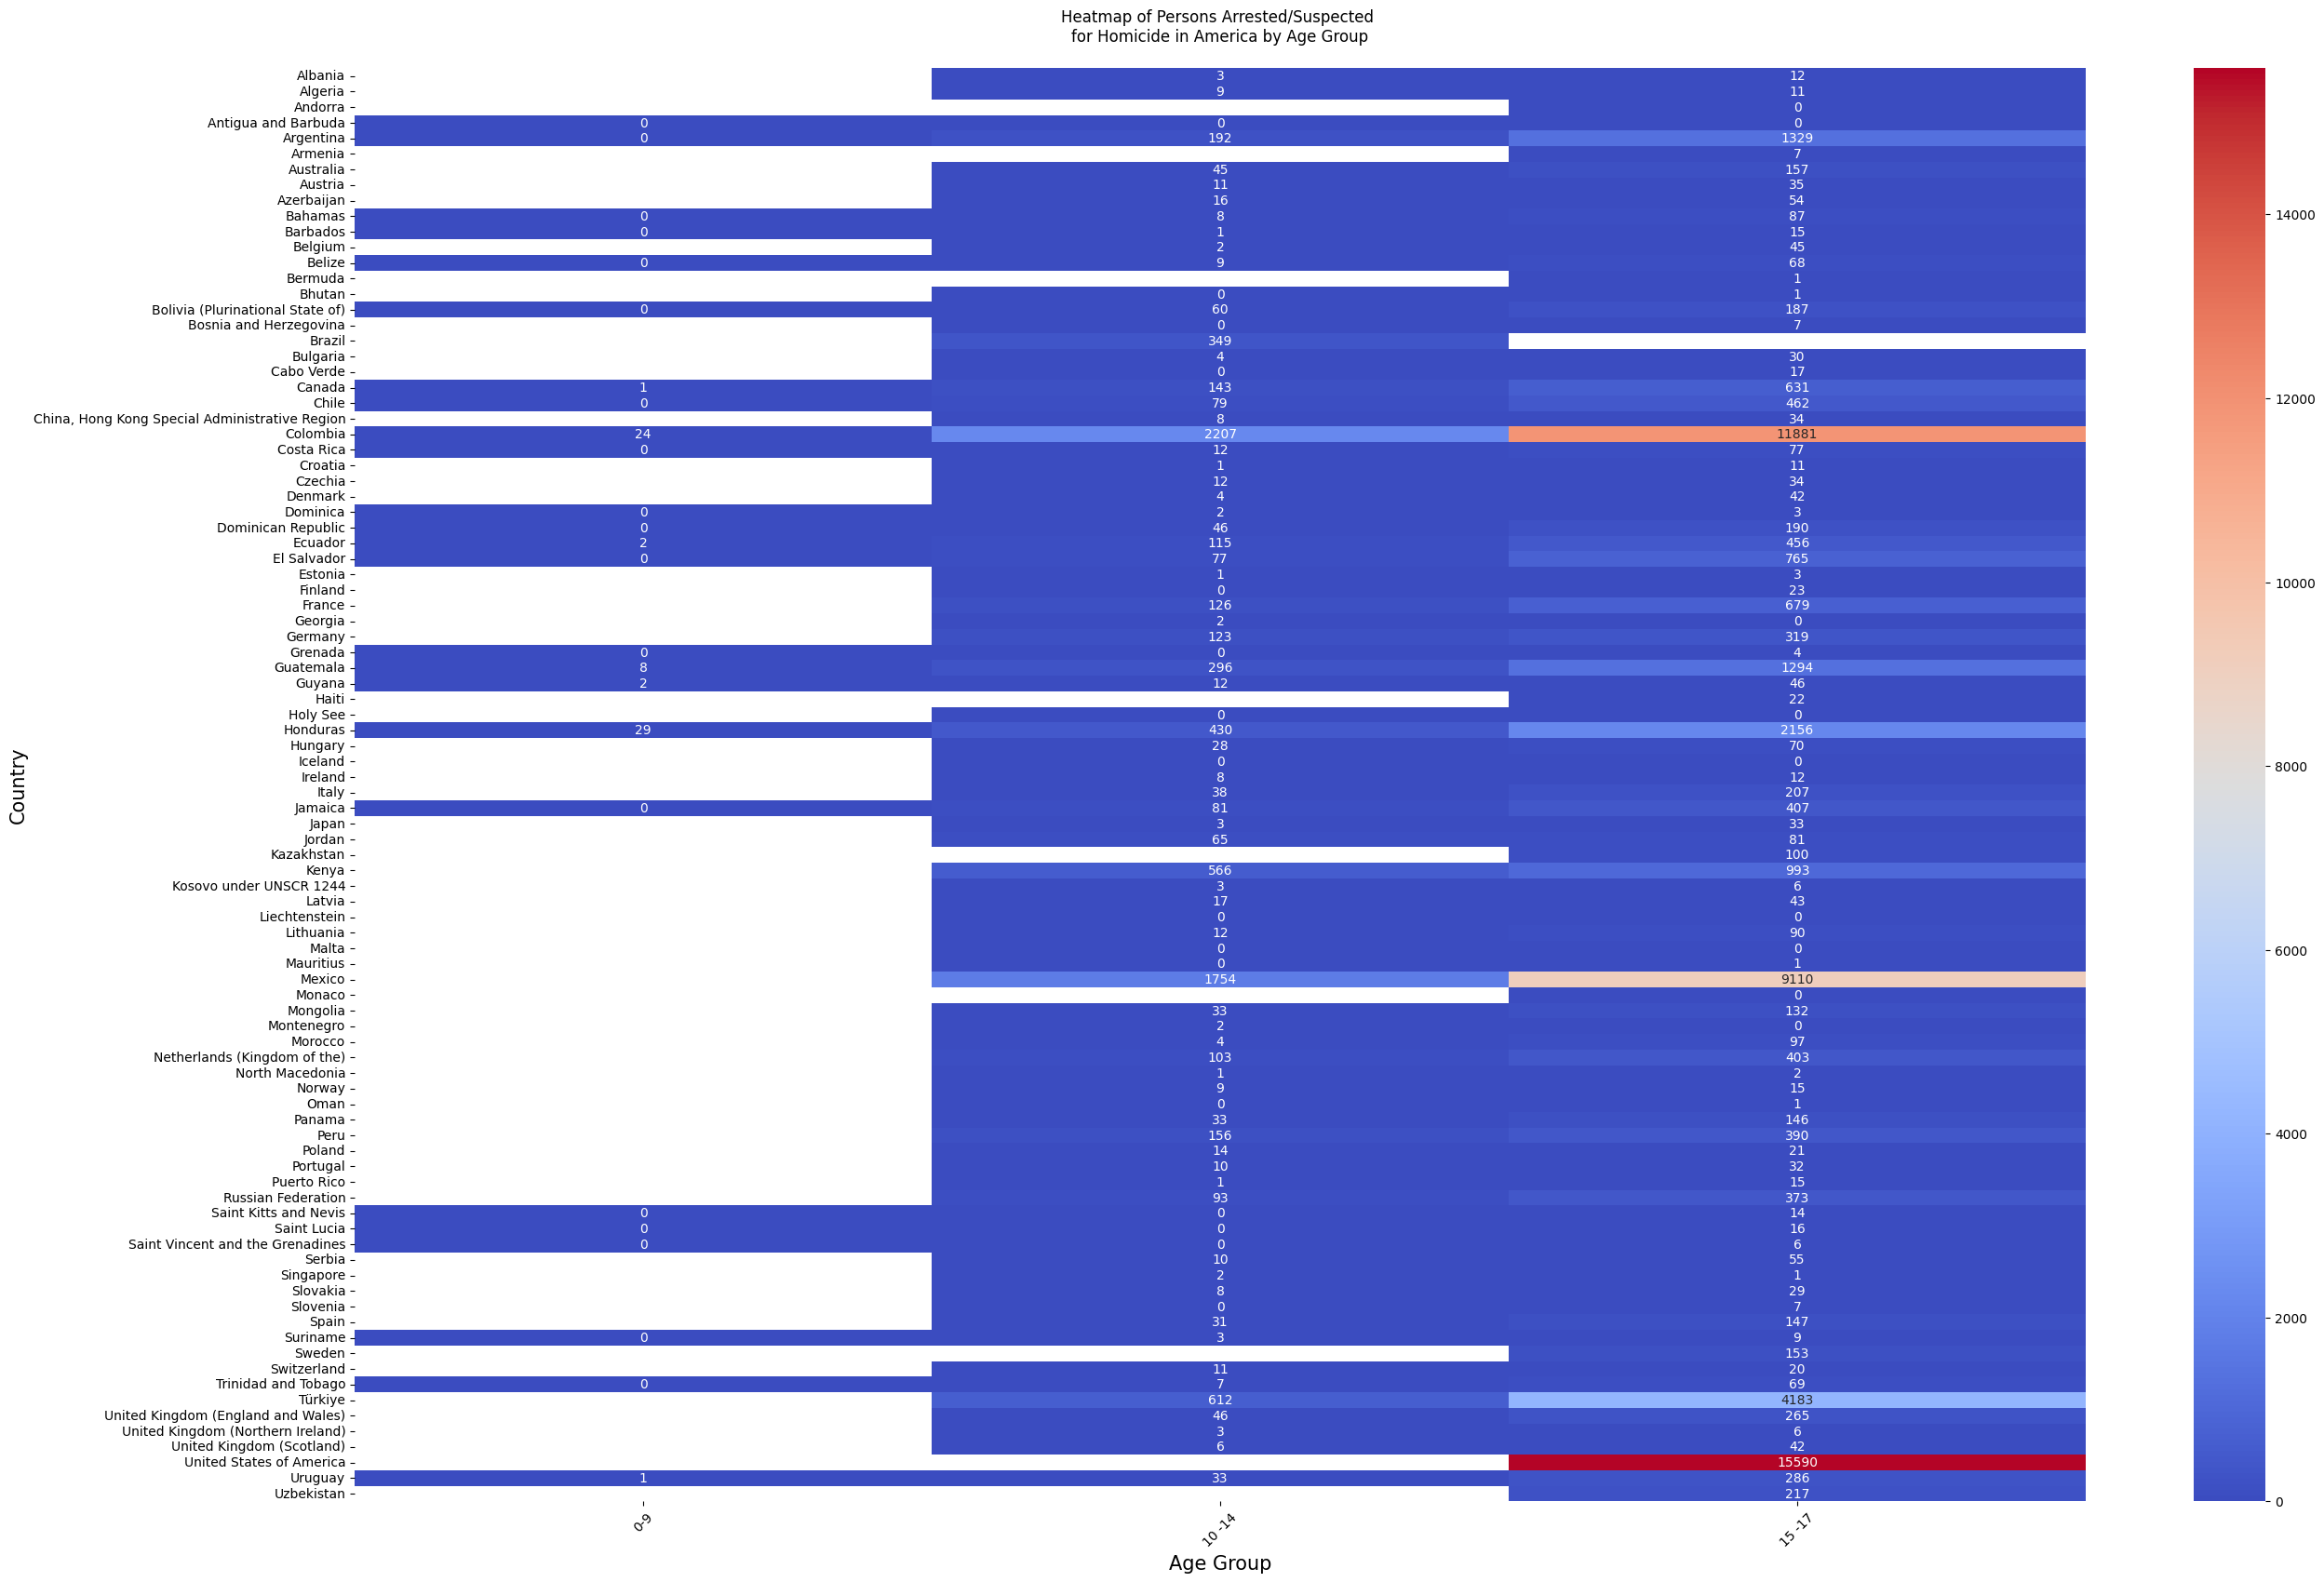

In [148]:
# Pivot the data to create a heatmap-friendly format
heatmap_data = filteredby_america1.pivot_table(index='Country', columns='Age', values='VALUE', aggfunc='sum')



# Create the heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".0f")

# Customize the plot
plt.xlabel('Age Group', fontsize=15)
plt.ylabel('Country', fontsize=15)
plt.title('Heatmap of Persons Arrested/Suspected \nfor Homicide in America by Age Group\n')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.show()


**Analysis:** Please enlarge the heatmap in fullscreen. You can see from the heatmap the commited homicide comes from age group 0-9 are the highest from country named Honduras , Colombia , Ecuador, Guetamala, and Canada. All of the countries are in central america.

<font color='red'>**No explanation?**

### <font color='red'>**How about conclusion remarks?**

# **Conclusion**

The analysis of individuals arrested or suspected for homicide reveals several important trends and keypoints. Over 20 years data, the number of suspects has generally declined in many regions between **2003 and 2022**, certain region in world that have highest commit homicide are predicted as the countries are known from the weak legal system, social culture, and lower inequality. That is why person as young as below 18 years old can commit to homicide.

As said , the regional differences highlight varying factors influencing homicide rates. Countries that famous with **strong legal systems, social structures** tend to have lower homicide rates such as New Zealand and Australia. While regions facing **economic instability, gang violence, or weak law enforcement** show higher numbers of suspects, such as Colombia, Honduras, Canada and few area that mostly come from central america.  

Age-wise, young individuals, particularly those in the **15-17 age group**, appear more frequently in homicide-related cases, emphasizing the need for **youth crime prevention programs** and improved **environment policy & structures** can be strictly implemented in targeted area.  

As we have already a focus on which region, countries and what age group we aimed, United Nation Associations can improve more in rehabilitation programs at Europe Region especially in countries like Germany & Italy.

Thank You